In [1]:
!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv ('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')


In [4]:
data['is_above_50K'] = data[' <=50K'] == ' >50K'
cols = ['age', 
'workclass', 
'fnlwgt', 
'education', 
'education-num', 
'marital-status', 
'occupation', 
'relationship', 
'race', 
'sex', 
'capital-gain', 
'capital-loss', 
'hours-per-week', 
'native-country', '<=50k', 'is_above_50k'] 

data.columns = cols

In [5]:
!pip install plotly


In [6]:
import plotly.express as px

In [7]:
data['is_above_50k_int'] = np.where (data['is_above_50k'], 1, 0)

**Undersample the data**  
* Need to undersample the majority class to create realisistic links between independent variables.
* If not undersampled, this can lead to majority class over-representing a group that is contributing to the income 
NOTE: explore different ways, such representing data as a ratio

In [8]:
sample_df = data[['education', 	'age', 'sex', 'is_above_50k_int']]
sample_df[sample_df['is_above_50k_int'] == 0].shape

(24719, 4)

In [9]:
sample_df

,education,age,sex,is_above_50k_int
0,Bachelors,50,Male,0
1,HS-grad,38,Male,0
2,11th,53,Male,0
3,Bachelors,28,Female,0
4,Masters,37,Female,0
...,...,...,...,...
32555,Assoc-acdm,27,Female,0
32556,HS-grad,40,Male,1
32557,HS-grad,58,Female,0
32558,HS-grad,22,Male,0


In [10]:
num_sample = sample_df[sample_df['is_above_50k_int'] == 1].shape[0]

In [75]:
below_50k_df = sample_df[sample_df['is_above_50k_int'] == 0].sample (n=num_sample)
above_50k_df = sample_df[sample_df['is_above_50k_int'] == 1]
data_df = pd.concat ((above_50k_df, below_50k_df))


* According to the plot, higher education contributes strongly to the likelyhood of income over 50K
* Split Ed into 2 groups Bachelors and above and below Bacherlors

In [76]:
data_df

,education,age,sex,is_above_50k_int
6,HS-grad,52,Male,1
7,Masters,31,Female,1
8,Bachelors,42,Male,1
9,Some-college,37,Male,1
10,Bachelors,30,Male,1
...,...,...,...,...
11103,Bachelors,27,Female,0
14830,Masters,48,Male,0
24954,Bachelors,28,Male,0
11086,9th,69,Male,0


In [77]:
#para`llel_set_df = data_df[['education', 	'age', 'sex', 'is_above_50k_int']].groupby(['education', 	'age', 'sex']).count().reset_index()
data_df['Higher_Education'] = data_df['education'].apply (lambda x: x in set ([' Bachelors', ' Doctorate', ' Masters', ' Prof-school']))

It looks like there is strong correlation between people between ages 35 and 65 and probability to be above 50K

In [78]:
data_df

,education,age,sex,is_above_50k_int,Higher_Education
6,HS-grad,52,Male,1,False
7,Masters,31,Female,1,True
8,Bachelors,42,Male,1,True
9,Some-college,37,Male,1,False
10,Bachelors,30,Male,1,True
...,...,...,...,...,...
11103,Bachelors,27,Female,0,True
14830,Masters,48,Male,0,True
24954,Bachelors,28,Male,0,True
11086,9th,69,Male,0,False


In [79]:
data_df['age_btw_35_and_65'] = data_df['age'].apply (lambda x: (x >= 35) & (x<= 65) )

In [80]:
parallel_set_df = data_df[['Higher_Education', 'age_btw_35_and_65', 'sex','is_above_50k_int']]

In [81]:
parallel_set_df

,Higher_Education,age_btw_35_and_65,sex,is_above_50k_int
6,False,True,Male,1
7,True,False,Female,1
8,True,True,Male,1
9,False,True,Male,1
10,True,False,Male,1
...,...,...,...,...
11103,True,False,Female,0
14830,True,True,Male,0
24954,True,False,Male,0
11086,False,False,Male,0


In [83]:
import plotly.graph_objects as go
import pandas as pd

# Create dimensions
Higher_Education_dim = go.parcats.Dimension(
    values=parallel_set_df.Higher_Education,
    categoryorder='category ascending', label="Higher_Education"
)

age_dim = go.parcats.Dimension(values=parallel_set_df.age_btw_35_and_65, label="Age Group[35-65]")
sex_dim = go.parcats.Dimension(values=parallel_set_df.sex, label="Genter")

is_above_50K_dim = go.parcats.Dimension(
    values=parallel_set_df.is_above_50k_int, label="Income > 50K", categoryarray=[0, 1],
    ticktext=['Below', 'Above']
)


color = parallel_set_df.is_above_50k_int;
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

fig = go.Figure(data = [go.Parcats(dimensions=[Higher_Education_dim, age_dim, sex_dim, is_above_50K_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

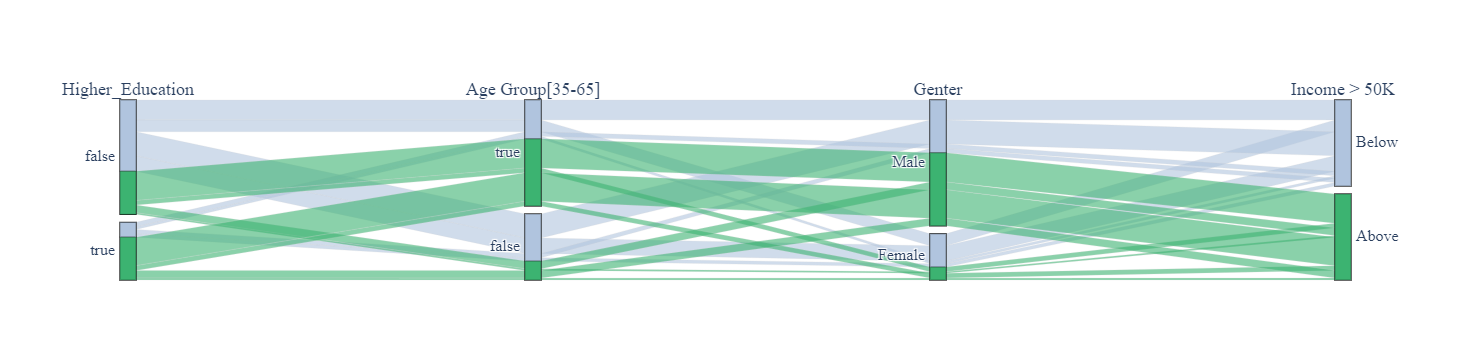

In [84]:
fig.show()